In [1]:
#!pip install statsmodels
#! pip install fbprophet
#!pip install "numpy<1.24.0"

In [35]:
import pandas as pd
import numpy as np
import fbprophet
import matplotlib.pyplot as plt

In [3]:
df_GOES_meteo_combined = pd.read_csv('//srv//scratch//NOAA//more_cleaned_data_Take_2_2006Fall_2017Spring_GOES_meteo_combined.csv')

/tmp/ipykernel_4045/907682762.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_GOES_meteo_combined = pd.read_csv('//srv//scratch//NOAA//more_cleaned_data_Take_2_2006Fall_2017Spring_GOES_meteo_combined.csv')


In [48]:
df = df_GOES_meteo_combined
df.head()

,Date_UTC,data_usable,Temp (F),Precip (in),Wind Spd (mph),Wind Direction (deg),is_snow_precip,lake0,lake1,lake2,...,lake3590,lake3591,lake3592,lake3593,lake3594,lake3595,lake3596,lake3597,lake3598,Date
0,2006-10-01 00:00:00,False,48.0,0.00,7.0,150.0,False,0.0075,0.0025,0.0000,...,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0025,2006-10-01 00:00:00
1,2006-10-01 01:00:00,False,48.0,0.00,8.0,150.0,False,0.0025,0.0000,0.0025,...,0.0025,0.0025,0.0025,0.0000,0.0025,0.0000,0.0,0.0,0.0000,2006-10-01 01:00:00
2,2006-10-01 02:00:00,False,48.0,0.00,6.0,150.0,False,0.0000,0.0000,0.0075,...,0.0050,0.0000,0.0000,0.0000,0.0025,0.0000,0.0,0.0,0.0000,2006-10-01 02:00:00
3,2006-10-01 03:00:00,False,48.0,0.00,8.0,150.0,False,0.0025,0.0000,0.0025,...,0.0025,0.0050,0.0000,0.0025,0.0000,0.0075,0.0,0.0,0.0000,2006-10-01 03:00:00
4,2006-10-01 04:00:00,False,48.0,0.02,5.0,150.0,False,0.0025,0.0000,0.0000,...,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,2006-10-01 04:00:00


In [49]:
df['Date'] = pd.to_datetime(df.Date_UTC , format = '%Y/%m/%d %H:%M')
data = df.drop(['Date_UTC'], axis=1)
# data.index = df.Date

In [50]:
data = data.drop(['data_usable', 'is_snow_precip'], axis = 1)
data.head()

,Temp (F),Precip (in),Wind Spd (mph),Wind Direction (deg),lake0,lake1,lake2,lake3,lake4,lake5,...,lake3590,lake3591,lake3592,lake3593,lake3594,lake3595,lake3596,lake3597,lake3598,Date
0,48.0,0.00,7.0,150.0,0.0075,0.0025,0.0000,0.0050,0.0000,0.0050,...,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0025,2006-10-01 00:00:00
1,48.0,0.00,8.0,150.0,0.0025,0.0000,0.0025,0.0025,0.0000,0.0000,...,0.0025,0.0025,0.0025,0.0000,0.0025,0.0000,0.0,0.0,0.0000,2006-10-01 01:00:00
2,48.0,0.00,6.0,150.0,0.0000,0.0000,0.0075,0.0000,0.0000,0.0025,...,0.0050,0.0000,0.0000,0.0000,0.0025,0.0000,0.0,0.0,0.0000,2006-10-01 02:00:00
3,48.0,0.00,8.0,150.0,0.0025,0.0000,0.0025,0.0000,0.0075,0.0000,...,0.0025,0.0050,0.0000,0.0025,0.0000,0.0075,0.0,0.0,0.0000,2006-10-01 03:00:00
4,48.0,0.02,5.0,150.0,0.0025,0.0000,0.0000,0.0000,0.0075,0.0000,...,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,2006-10-01 04:00:00


In [51]:
data.columns

Index(['Temp (F)', 'Precip (in)', 'Wind Spd (mph)', 'Wind Direction (deg)',
       'lake0', 'lake1', 'lake2', 'lake3', 'lake4', 'lake5',
       ...
       'lake3590', 'lake3591', 'lake3592', 'lake3593', 'lake3594', 'lake3595',
       'lake3596', 'lake3597', 'lake3598', 'Date'],
      dtype='object', length=3604)

In [52]:
from fbprophet import Prophet

In [53]:
data.rename(columns={"Date":"ds"}, inplace = True)
data['y'] = data[['Temp (F)']]
data = data.drop(['Temp (F)'], axis =1)
data = data.fillna(0)
data

,Precip (in),Wind Spd (mph),Wind Direction (deg),lake0,lake1,lake2,lake3,lake4,lake5,lake6,...,lake3591,lake3592,lake3593,lake3594,lake3595,lake3596,lake3597,lake3598,ds,y
0,0.00,7.0,150.0,0.0075,0.0025,0.0000,0.0050,0.0000,0.0050,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,2006-10-01 00:00:00,48.0
1,0.00,8.0,150.0,0.0025,0.0000,0.0025,0.0025,0.0000,0.0000,0.0000,...,0.0025,0.0025,0.0000,0.0025,0.0000,0.0000,0.0000,0.0000,2006-10-01 01:00:00,48.0
2,0.00,6.0,150.0,0.0000,0.0000,0.0075,0.0000,0.0000,0.0025,0.0000,...,0.0000,0.0000,0.0000,0.0025,0.0000,0.0000,0.0000,0.0000,2006-10-01 02:00:00,48.0
3,0.00,8.0,150.0,0.0025,0.0000,0.0025,0.0000,0.0075,0.0000,0.0050,...,0.0050,0.0000,0.0025,0.0000,0.0075,0.0000,0.0000,0.0000,2006-10-01 03:00:00,48.0
4,0.02,5.0,150.0,0.0025,0.0000,0.0000,0.0000,0.0075,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2006-10-01 04:00:00,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48116,0.00,11.0,310.0,0.2200,0.1925,0.1775,0.1675,0.1650,0.1500,0.1450,...,0.9025,0.8975,0.9175,0.8650,0.8750,0.9025,0.8825,0.7175,2015-03-31 19:00:00,37.0
48117,0.00,0.0,0.0,0.2575,0.2200,0.2125,0.1800,0.1850,0.1675,0.1650,...,0.7975,0.7600,0.8325,0.7950,0.7350,0.7275,0.6850,0.7000,2015-03-31 20:00:00,36.0
48118,0.00,0.0,0.0,0.2225,0.1825,0.1900,0.1800,0.1725,0.1850,0.1750,...,0.7650,0.6700,0.6625,0.7075,0.7525,0.8150,0.7875,0.7425,2015-03-31 21:00:00,36.0
48119,0.00,0.0,0.0,0.1800,0.1675,0.1675,0.1600,0.1575,0.1525,0.1825,...,0.6150,0.5900,0.5525,0.5600,0.4975,0.4875,0.4950,0.5150,2015-03-31 22:00:00,36.0


In [55]:
data.isnull().sum()

Precip (in)             0
Wind Spd (mph)          0
Wind Direction (deg)    0
lake0                   0
lake1                   0
                       ..
lake3596                0
lake3597                0
lake3598                0
ds                      0
y                       0
Length: 3604, dtype: int64

In [56]:
data.dtypes

Precip (in)                    float64
Wind Spd (mph)                 float64
Wind Direction (deg)           float64
lake0                          float64
lake1                          float64
                             ...      
lake3596                       float64
lake3597                       float64
lake3598                       float64
ds                      datetime64[ns]
y                              float64
Length: 3604, dtype: object

In [58]:
data[(data['ds'] >= '2006-10-01 00:00:00') & (data['ds'] <= '2016-03-31 00:00:00')]['ds']

0       2006-10-01 00:00:00
1       2006-10-01 01:00:00
2       2006-10-01 02:00:00
3       2006-10-01 03:00:00
4       2006-10-01 04:00:00
                ...        
48116   2015-03-31 19:00:00
48117   2015-03-31 20:00:00
48118   2015-03-31 21:00:00
48119   2015-03-31 22:00:00
48120   2015-03-31 23:00:00
Name: ds, Length: 43730, dtype: datetime64[ns]

In [59]:
data[(data['ds'] > '2016-03-31 00:00:00')]['ds']

8736    2016-10-01 00:00:00
8737    2016-10-01 01:00:00
8738    2016-10-01 02:00:00
8739    2016-10-01 03:00:00
8740    2016-10-01 04:00:00
                ...        
26252   2016-03-31 19:00:00
26253   2016-03-31 20:00:00
26254   2016-03-31 21:00:00
26255   2016-03-31 22:00:00
26256   2016-03-31 23:00:00
Name: ds, Length: 4391, dtype: datetime64[ns]

In [11]:
train=data[(data['ds'] >= '2006-10-01 00:00:00') & (data['ds'] <= '2016-03-31 00:00:00')]
test=data[(data['ds'] > '2016-03-31 00:00:00')]

In [12]:
train.shape

(43730, 3604)

In [13]:
test.shape

(4391, 3604)

In [25]:
test

,Precip (in),Wind Spd (mph),Wind Direction (deg),lake0,lake1,lake2,lake3,lake4,lake5,lake6,...,lake3591,lake3592,lake3593,lake3594,lake3595,lake3596,lake3597,lake3598,ds,y
8736,0.0,6.0,60.0,0.0025,0.0050,0.0000,0.0025,0.0000,0.0050,0.0000,...,0.0050,0.0025,0.0000,0.0000,0.0000,0.0025,0.0050,0.0000,2016-10-01 00:00:00,62.0
8737,0.0,6.0,70.0,0.0000,0.0000,0.0000,0.0050,0.0000,0.0000,0.0025,...,0.0025,0.0075,0.0025,0.0000,0.0000,0.0100,0.0025,0.0025,2016-10-01 01:00:00,63.0
8738,0.0,7.0,80.0,0.0050,0.0025,0.0000,0.0000,0.0000,0.0000,0.0025,...,0.0000,0.0050,0.0000,0.0050,0.0000,0.0050,0.0000,0.0000,2016-10-01 02:00:00,62.0
8739,0.0,10.0,90.0,0.0025,0.0000,0.0000,0.0025,0.0050,0.0000,0.0050,...,0.0000,0.0025,0.0000,0.0000,0.0075,0.0050,0.0025,0.0000,2016-10-01 03:00:00,62.0
8740,0.0,6.0,70.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,...,0.0025,0.0025,0.0025,0.0075,0.0000,0.0025,0.0050,0.0050,2016-10-01 04:00:00,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26252,0.0,17.0,300.0,0.2575,0.2400,0.2975,0.8500,0.9650,1.0150,0.9200,...,0.9275,0.9250,0.8875,0.8825,0.9025,0.9000,0.9075,0.9050,2016-03-31 19:00:00,38.0
26253,0.0,16.0,310.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2016-03-31 20:00:00,36.0
26254,0.0,10.0,310.0,0.6450,0.5075,0.6425,0.3775,0.7075,0.4450,0.2325,...,0.7925,0.7325,0.7625,0.7675,0.7825,0.7325,0.7075,0.7000,2016-03-31 21:00:00,35.0
26255,0.0,9.0,320.0,0.4800,0.5150,0.4875,0.1825,0.4675,0.2350,0.3750,...,0.4475,0.4275,0.4900,0.4750,0.4325,0.4550,0.4600,0.4925,2016-03-31 22:00:00,35.0


In [14]:
train.dtypes

Precip (in)                    float64
Wind Spd (mph)                 float64
Wind Direction (deg)           float64
lake0                          float64
lake1                          float64
                             ...      
lake3596                       float64
lake3597                       float64
lake3598                       float64
ds                      datetime64[ns]
y                              float64
Length: 3604, dtype: object

In [15]:
data.columns[:-2]

Index(['Precip (in)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'lake0',
       'lake1', 'lake2', 'lake3', 'lake4', 'lake5', 'lake6',
       ...
       'lake3589', 'lake3590', 'lake3591', 'lake3592', 'lake3593', 'lake3594',
       'lake3595', 'lake3596', 'lake3597', 'lake3598'],
      dtype='object', length=3602)

In [16]:
# for station in stations.groups:
#     group = stations.get_group(station)
    
m = Prophet(interval_width=0.95)
for col in data.columns[:2]: 
    m.add_regressor(col, standardize = True)
m.fit(train)
# future = m.make_future_dataframe(periods=8760)
# forecast = m.predict(future)  
    #m.plot(forecast)  
#     forecast = forecast.rename(columns={'yhat': 'yhat_'+station})
#     target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

/opt/tljh/user/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/tljh/user/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -219.437
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        107484    0.00523515          2804      0.3777           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        107702     0.0279422       12014.6           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        107909   0.000392178       4139.87      0.7484      0.7484      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        107982    0.00920845       7854.76           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        108068    0.00913088       2949.89           1           1      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

   108196    0.00127519        3048.3      0.2977      0.2977      681   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699        108213   0.000848129       1090.81           1           1      791   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799        108244    0.00175822       832.177           1           1      905   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899        108255    0.00299529        1333.7           1           1     1016   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999        108262   0.000147323       238.156           1           1     1126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099        108267   0.000666713       533.189           1           1     1232   
    Iter      log prob        |

In [17]:
m.params

{'k': array([[1.83115247]]),
 'm': array([[0.27110922]]),
 'delta': array([[-1.49885446e+00,  2.62391955e-04, -5.34764842e-01,
          2.29382865e-04, -4.94888627e-01,  6.84662594e-01,
          7.40469036e-05,  6.23182360e-01, -7.09231168e-01,
          8.94474492e-01,  4.30835272e-01, -1.54978299e+00,
         -2.98170326e-04,  4.16768452e-01, -2.91738326e-02,
          1.26956865e+00,  3.99318907e-01, -2.45387666e+00,
          1.05147840e+00, -4.56682073e-01, -3.48856549e-02,
         -9.03956359e-01,  3.07327954e-01,  7.20327453e-06,
          1.13982623e+00]]),
 'sigma_obs': array([[0.05056017]]),
 'beta': array([[ 4.57753602e-01, -1.37584388e-01, -3.66706755e-01,
         -1.37126750e-01, -2.65004770e-01,  1.47192360e-01,
          5.90485534e-01,  1.92073465e-02, -2.16148720e-01,
         -1.50791715e-01, -4.71379497e-01,  1.22318814e-01,
          8.40722826e-01,  2.18720316e-02, -6.89434781e-01,
         -1.12233798e-01,  3.13464420e-01,  9.66210074e-02,
         -6.6247297

In [40]:
forecast = m.predict(test)
forecast = forecast[['ds', 'yhat']]
forecast

/opt/tljh/user/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/tljh/user/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/tljh/user/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/tljh/user/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat
0,2016-03-31 01:00:00,42.270947
1,2016-03-31 02:00:00,42.069105
2,2016-03-31 03:00:00,41.958336
3,2016-03-31 04:00:00,41.866830
4,2016-03-31 05:00:00,41.716399
...,...,...
4386,2017-03-31 19:00:00,53.293477
4387,2017-03-31 20:00:00,52.982568
4388,2017-03-31 21:00:00,52.817280
4389,2017-03-31 22:00:00,52.361710


In [31]:
# forecast['Date'] = pd.to_datetime(forecats.Date_UTC , format = '%Y/%m/%d %H:%M')
# data = df.drop(['Date_UTC'], axis=1)
# forecast.index = forecast.ds
# forecast = forecast.drop(['ds'], axis =1)
# forecast

,yhat
ds,
2016-03-31 01:00:00,42.270947
2016-03-31 02:00:00,42.069105
2016-03-31 03:00:00,41.958336
2016-03-31 04:00:00,41.866830
2016-03-31 05:00:00,41.716399
...,...
2017-03-31 19:00:00,53.293477
2017-03-31 20:00:00,52.982568
2017-03-31 21:00:00,52.817280


In [43]:
test['ds']

8736    2016-10-01 00:00:00
8737    2016-10-01 01:00:00
8738    2016-10-01 02:00:00
8739    2016-10-01 03:00:00
8740    2016-10-01 04:00:00
                ...        
26252   2016-03-31 19:00:00
26253   2016-03-31 20:00:00
26254   2016-03-31 21:00:00
26255   2016-03-31 22:00:00
26256   2016-03-31 23:00:00
Name: ds, Length: 4391, dtype: datetime64[ns]

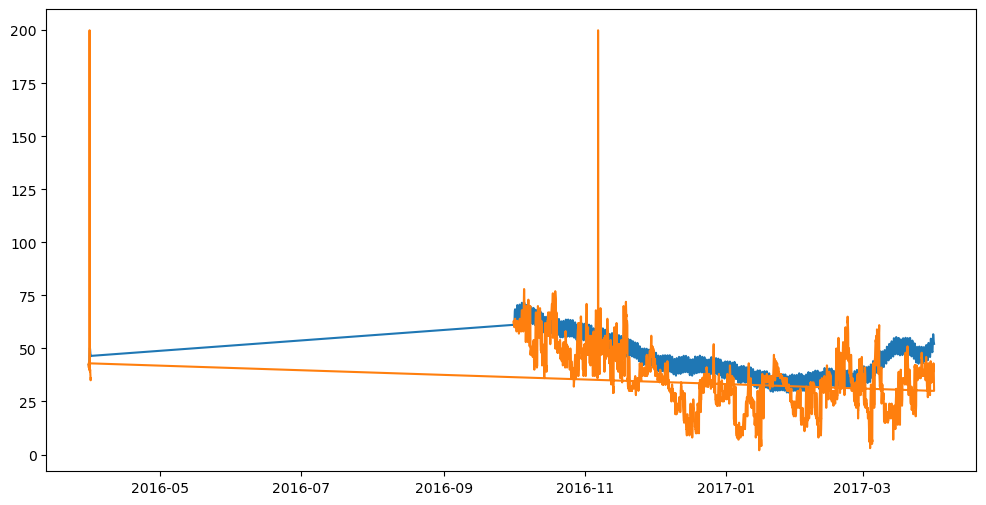

In [60]:
plt.figure(figsize=(12,6))
plt.plot(forecast['ds'], forecast['yhat'])
plt.plot(test['ds'], test['y'])